In [1]:
# !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
CHECKPOINT_PATH= "sam_vit_h_4b8939.pth"

In [2]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [3]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [4]:
mask_generator = SamAutomaticMaskGenerator(sam)
predictor = SamPredictor(sam)

In [5]:
import os
import glob
HOME = "/Users/nihaarshah/Documents/job_search23/raspberry_ai/"
IMAGES=glob.glob(HOME+"*.jpeg")
l2=glob.glob(HOME+"*.png")
IMAGES.extend(l2)

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
image = cv2.imread(IMAGES[2])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
def show_anns(anns):
    sorted_anns = sorted(anns,key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1],4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3),[0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [8]:
def compute_distances_to_boundary(mask):
    h, w = mask.shape
    distances = []

    for i in range(h):
        for j in range(w):
            if mask[i,j]:  # If the pixel is part of the mask
                distance_to_top = i
                distance_to_bottom = h - 1 - i
                distance_to_left = j
                distance_to_right = w - 1 - j
                min_distance = min(distance_to_top, distance_to_bottom, distance_to_left, distance_to_right)
                distances.append(min_distance)
    return distances
def score(anns):
    
    areas = [(x['area'],np.std(compute_distances_to_boundary(x['segmentation']))) for x in anns]        
    
    area_std_mean_list_tuples = [(i,(x['area'],np.std(compute_distances_to_boundary(x['segmentation'])),np.mean(compute_distances_to_boundary(x['segmentation'])))) for i,x in enumerate(anns)]
    top_k_area = sorted(area_std_mean_list_tuples, key=lambda x: (-x[1][0]))[0:3]
    top_k_area_top_j_mean = sorted(top_k_area, key=lambda x: (-x[1][2]))[0:2]
    top_k_area_top_j_mean_top_l_std = sorted(top_k_area_top_j_mean, key=lambda x: (x[1][1]))[0:1]
    return top_k_area_top_j_mean_top_l_std[0][0]

In [20]:
!git init
!git remote add origin https://github.com/nihaarshah/segment_anything_fashion.git

Initialized empty Git repository in /Users/nihaarshah/code/transformers/.git/


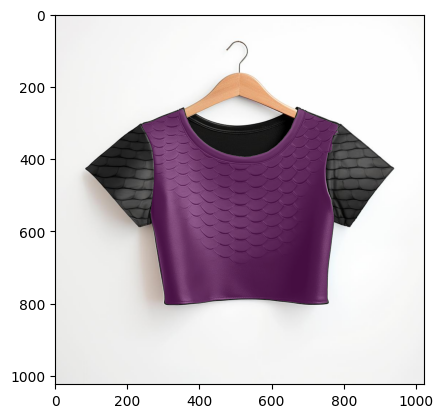

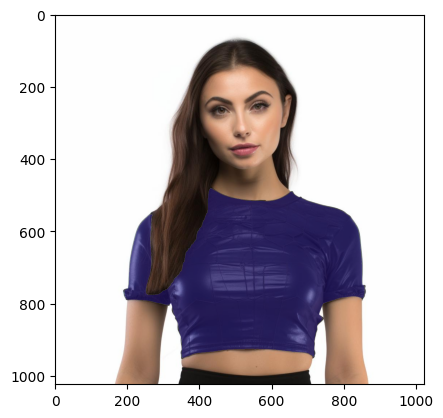

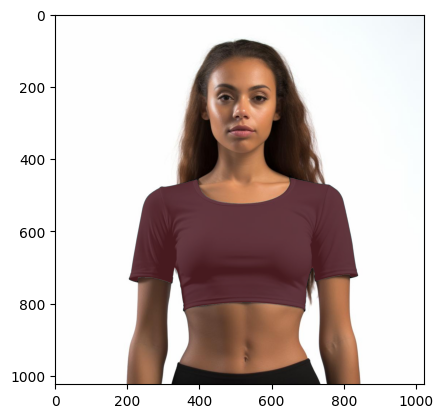

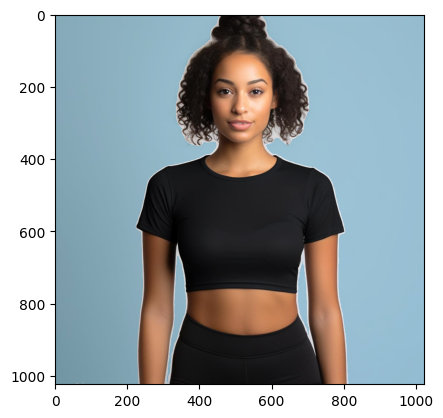

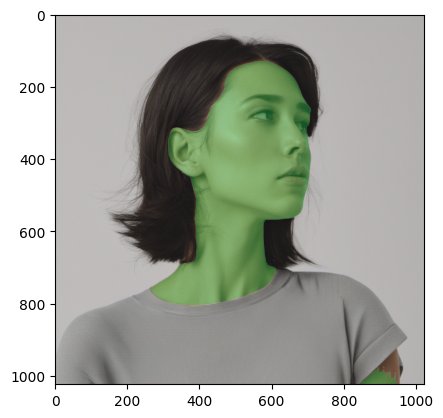

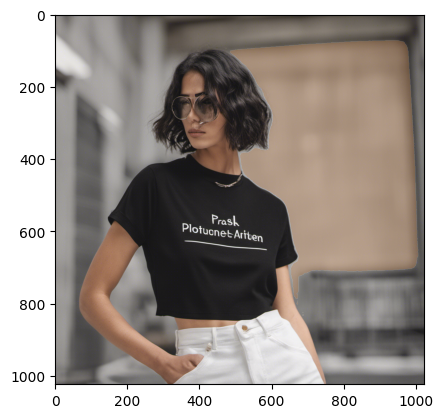

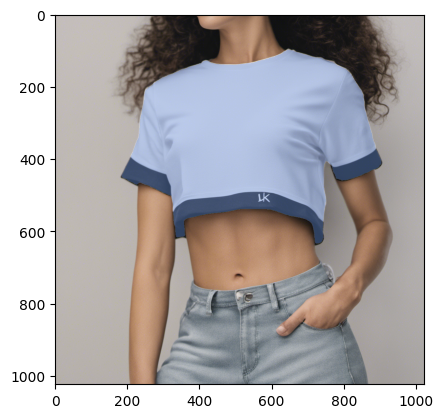

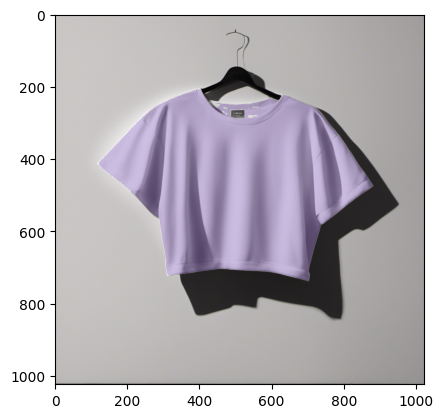

In [16]:
for IMAGE in IMAGES:
    image = cv2.imread(IMAGE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    masks = mask_generator.generate(image)
    plt.figure()
    plt.imshow(image)
    ax=plt.gca()
    show_anns([masks[score(masks)]])

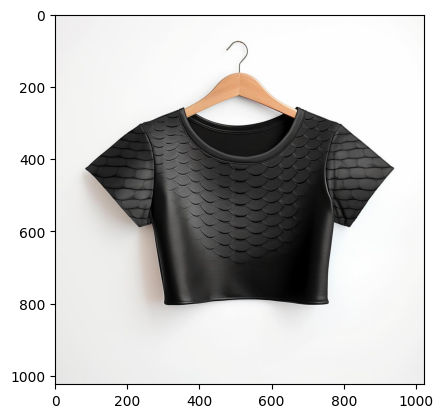

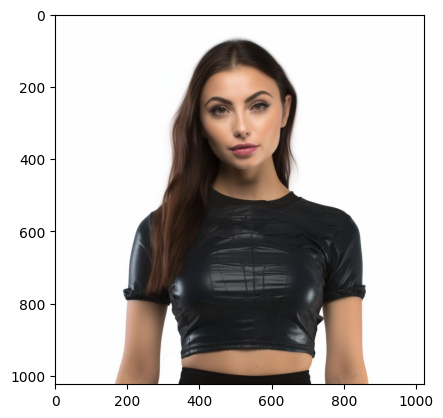

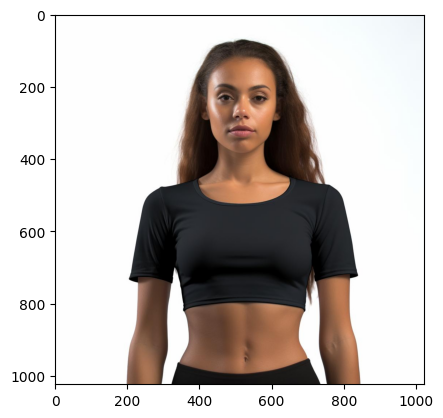

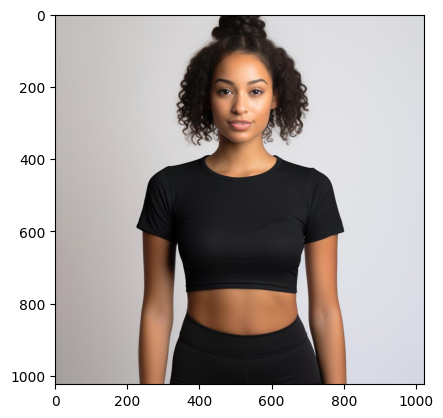

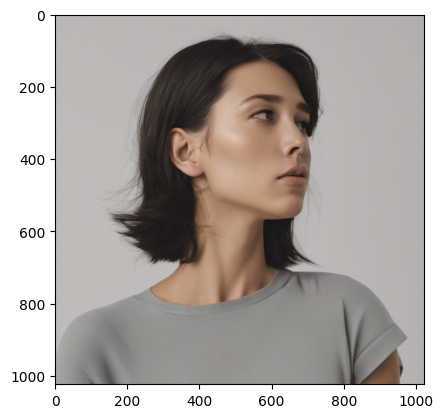

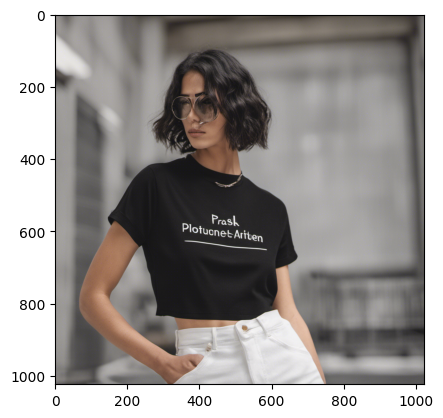

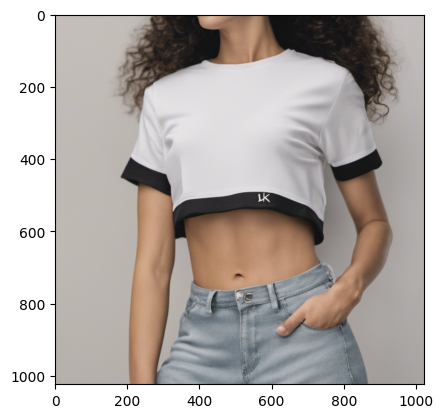

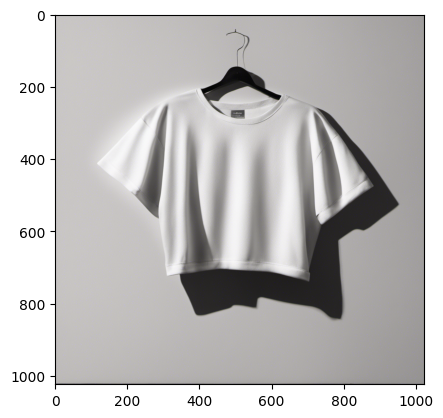

In [17]:
for IMAGE in IMAGES:
    image = cv2.imread(IMAGE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(image)
    ax=plt.gca()

In [ ]:
# Just some examples of histograms for masks

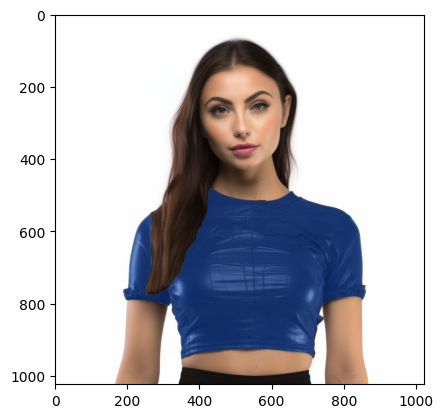

In [76]:
sorted_masks = sorted(masks,key=(lambda x: x['area']), reverse=True)
plt.imshow(image)
ax=plt.gca()
show_anns([sorted_masks[2]])
# show_centroid(sorted_masks[0],ax)

(array([ 9473., 16538., 23647., 38861., 32448., 24315., 20605., 15996.,
        12309.,  3905.]),
 array([ 72. , 115.9, 159.8, 203.7, 247.6, 291.5, 335.4, 379.3, 423.2,
        467.1, 511. ]),
 <BarContainer object of 10 artists>)

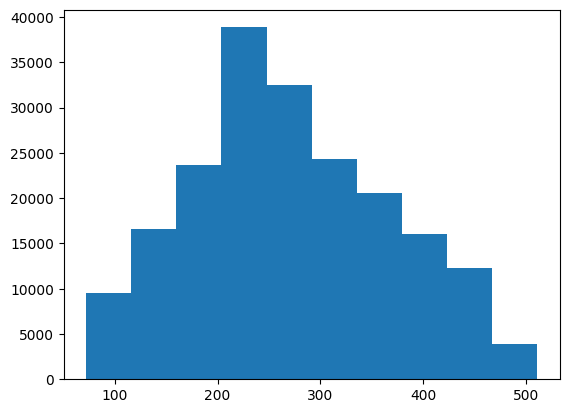

In [77]:
dist_2 = compute_distances_to_boundary(sorted_masks[2]['segmentation'])
plt.hist(dist_2)

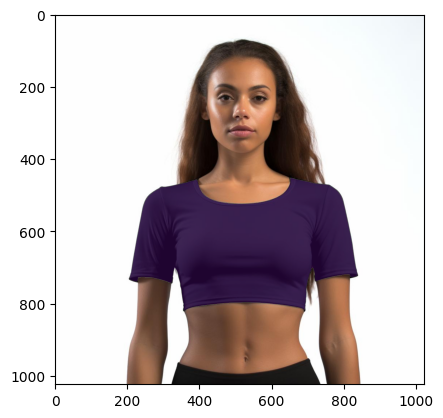

In [10]:
plt.imshow(image)
ax=plt.gca()
show_anns([masks[score(masks)]])